## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'yfinance'

## 1. Mengambil Data Historis Bitcoin

In [4]:
data = yf.download('BTC-USD', start='2015-01-01', end='2024-12-01')

# Menampilkan data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2015-01-01,314.248993,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,274.473999,278.341003,265.084015,265.084015,43962800


## 2. Preprocessing Data

In [5]:
# Mengambil hanya harga penutupan
data_close = data['Close'].values
data_close = data_close.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_close)

# Membuat data latih dan data uji
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan langkah waktu tertentu
def create_dataset(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

# Membuat data latih dan data uji
time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshaping data untuk input ke LSTM (batch_size, time_steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## 3. Membangun Model LSTM

In [6]:
model = Sequential()

# Menambahkan layer LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Menambahkan layer Dense
model.add(Dense(units=1))

## 4. Kompilasi Model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

## 5. Melatih Model

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
89/89 [==============================] - 4s 28ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 2/10
89/89 [==============================] - 2s 22ms/step - loss: 3.6734e-04 - val_loss: 0.0017
Epoch 3/10
89/89 [==============================] - 2s 22ms/step - loss: 3.3915e-04 - val_loss: 8.3167e-04
Epoch 4/10
89/89 [==============================] - 2s 22ms/step - loss: 3.1298e-04 - val_loss: 9.0715e-04
Epoch 5/10
89/89 [==============================] - 2s 21ms/step - loss: 2.8896e-04 - val_loss: 8.9103e-04
Epoch 6/10
89/89 [==============================] - 2s 22ms/step - loss: 2.6831e-04 - val_loss: 0.0014
Epoch 7/10
89/89 [==============================] - 2s 21ms/step - loss: 2.3286e-04 - val_loss: 0.0010
Epoch 8/10
89/89 [==============================] - 2s 22ms/step - loss: 2.1305e-04 - val_loss: 5.5165e-04
Epoch 9/10
89/89 [==============================] - 2s 22ms/step - loss: 2.0639e-04 - val_loss: 6.3114e-04
Epoch 10/10
89/89 [==============================] - 2s 2

## 6. Evaluasi Model

1/1 [==============================] - 0s 18ms/step


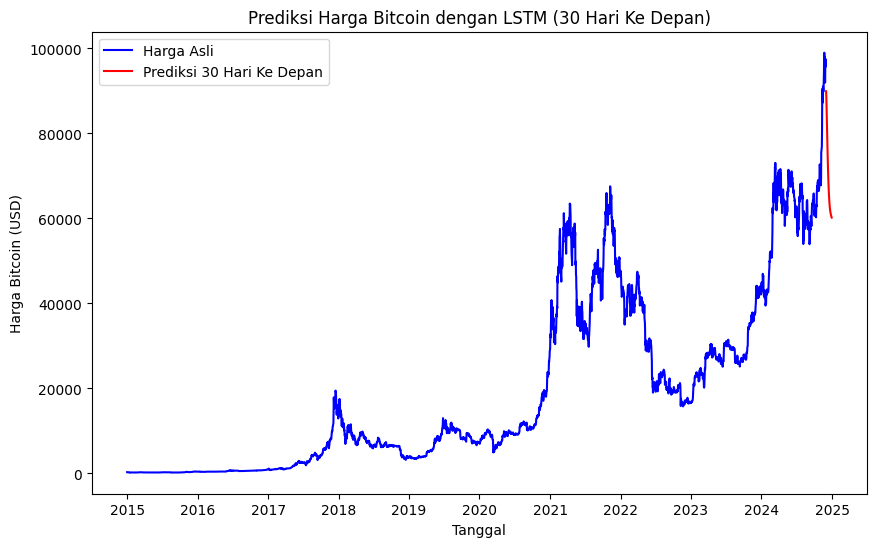

Prediksi Harga Bitcoin untuk 30 Hari Ke Depan:
2024-12-01: $89938.78
2024-12-02: $88931.09
2024-12-03: $87326.92
2024-12-04: $85407.17
2024-12-05: $83336.67
2024-12-06: $81219.34
2024-12-07: $79123.46
2024-12-08: $77095.45
2024-12-09: $75167.41
2024-12-10: $73361.30
2024-12-11: $71691.37
2024-12-12: $70165.57
2024-12-13: $68786.74
2024-12-14: $67553.48
2024-12-15: $66460.98
2024-12-16: $65501.86
2024-12-17: $64666.75
2024-12-18: $63945.03
2024-12-19: $63325.22
2024-12-20: $62795.61
2024-12-21: $62344.51
2024-12-22: $61960.57
2024-12-23: $61633.10
2024-12-24: $61352.12
2024-12-25: $61108.58
2024-12-26: $60894.36
2024-12-27: $60702.32
2024-12-28: $60526.46
2024-12-29: $60361.57
2024-12-30: $60203.45


In [11]:
def predict_future_days(model, last_60_days, future_days=30):
    future_prices = []
    current_input = last_60_days.reshape(1, -1)
    current_input = current_input.reshape((current_input.shape[0], current_input.shape[1], 1))
    
    for _ in range(future_days):
        predicted_price = model.predict(current_input)
        future_prices.append(predicted_price[0][0])
        
        # Update input untuk prediksi berikutnya
        current_input = np.append(current_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

    return future_prices

# Mengambil data terakhir (60 hari terakhir)
last_60_days = data_scaled[-60:]

# Prediksi 30 hari ke depan
predicted_future_prices = predict_future_days(model, last_60_days, future_days=30)

# Mengembalikan prediksi ke skala asli
predicted_future_prices = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Menampilkan hasil prediksi
predicted_dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(10,6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), color='blue', label='Harga Asli')
plt.plot(predicted_dates, predicted_future_prices, color='red', label='Prediksi 30 Hari Ke Depan')
plt.title('Prediksi Harga Bitcoin dengan LSTM (30 Hari Ke Depan)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.legend()
plt.show()

print("Prediksi Harga Bitcoin untuk 30 Hari Ke Depan:")
for date, price in zip(predicted_dates, predicted_future_prices):
    print(f"{date.date()}: ${price[0]:.2f}")

## 7. Prediksi Harga Bitcoin ke Depan

In [10]:
last_60_days = data_scaled[-60:].reshape(1, -1)
last_60_days = last_60_days.reshape((last_60_days.shape[0], last_60_days.shape[1], 1))
predicted_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)
print(f'Prediksi harga Bitcoin untuk hari berikutnya: ${predicted_price[0][0]:.2f}')

1/1 [==============================] - 0s 21ms/step
Prediksi harga Bitcoin untuk hari berikutnya: $89938.78
